<b id="Top"> </b>  

1. [Relevant libraries](#1)
2. [dtypes & info](#2)
3. [Noisy data](#3)
4. [conditional selection](#4)


---

#### Information on the data
The target of our project is ... <br>taken from [Kaggle](https://www.kaggle.com/datasets/sazidthe1/nobel-prize-data)

In [102]:
#!pip install geopandas
#!pip install folium
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import requests
from IPython.display import Image
from matplotlib.patches import Patch

In [103]:
url = 'https://raw.githubusercontent.com/SarahB21/Project2024/main/nobel_laureates_data.csv'
nobel_data = pd.read_csv(url)
nobel_data.head()

,year,category,motivation,prizeShare,laureateID,fullName,gender,born,bornCountry,bornCity,died,diedCountry,diedCity,organizationName,organizationCountry,organizationCity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA
2,2023,peace,for her fight against the oppression of women ...,1,1033,Narges Mohammadi,female,21-04-1972,Iran,Zanjan,0000-00-00,NaN,NaN,NaN,NaN,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,1032,Jon Fosse,male,29-09-1959,Norway,Haugesund,0000-00-00,NaN,NaN,NaN,NaN,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,1031,Alexei Ekimov,male,1945-00-00,Russia,NaN,0000-00-00,NaN,NaN,Nanocrystals Technology Inc.,USA,New York NY


In [104]:
url = 'https://raw.githubusercontent.com/SarahB21/Project2024/main/nobel_laureates_data.csv'
nobel_data = pd.read_csv(url)
nobel_data.shape

(1000, 16)

In [105]:
nobel_data.columns

Index(['year', 'category', 'motivation', 'prizeShare', 'laureateID',
       'fullName', 'gender', 'born', 'bornCountry', 'bornCity', 'died',
       'diedCountry', 'diedCity', 'organizationName', 'organizationCountry',
       'organizationCity'],
      dtype='object')

In [106]:
category_unique = nobel_data['category'].unique()
print(category_unique)


['medicine' 'economics' 'peace' 'literature' 'chemistry' 'physics']


In [107]:
nobel_data.drop_duplicates(subset=['year', 'category', 'motivation', 'prizeShare', 'laureateID',
       'fullName', 'gender', 'born', 'bornCountry', 'bornCity', 'died',
       'diedCountry', 'diedCity', 'organizationName', 'organizationCountry',
       'organizationCity'], inplace=True)
nobel_data.shape

(1000, 16)

In [108]:
nobel_data.rename(columns=lambda x: x.capitalize(), inplace=True)


In [109]:
nobel_data.head(2)

,Year,Category,Motivation,Prizeshare,Laureateid,Fullname,Gender,Born,Borncountry,Borncity,Died,Diedcountry,Diedcity,Organizationname,Organizationcountry,Organizationcity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA


### 1. Wrangling data

In [110]:
nobel_data.columns

Index(['Year', 'Category', 'Motivation', 'Prizeshare', 'Laureateid',
       'Fullname', 'Gender', 'Born', 'Borncountry', 'Borncity', 'Died',
       'Diedcountry', 'Diedcity', 'Organizationname', 'Organizationcountry',
       'Organizationcity'],
      dtype='object')

In [111]:
nobel_data.isnull().sum()

Year                     0
Category                 0
Motivation               0
Prizeshare               0
Laureateid               0
Fullname                 0
Gender                   0
Born                     0
Borncountry             30
Borncity                34
Died                    30
Diedcountry            348
Diedcity               354
Organizationname       264
Organizationcountry    267
Organizationcity       269
dtype: int64

In [112]:
# nobel_data['Gender'] = nobel_data['Gender'].replace('org', 'organization')
nobel_data['Died'].fillna('UNREPORTED', inplace=True)
nobel_data['Borncountry'].fillna('UNREPORTED', inplace=True)
nobel_data['Borncity'].fillna('UNREPORTED', inplace=True)
nobel_data['Diedcountry'].fillna('UNREPORTED', inplace=True)
nobel_data['Diedcity'].fillna('UNREPORTED', inplace=True)
nobel_data['Organizationname'].fillna('UNREPORTED', inplace=True)
nobel_data['Organizationcountry'].fillna('UNREPORTED', inplace=True)
nobel_data['Organizationcity'].fillna('UNREPORTED', inplace=True)
 
nobel_data.dtypes

Year                    int64
Category               object
Motivation             object
Prizeshare              int64
Laureateid              int64
Fullname               object
Gender                 object
Born                   object
Borncountry            object
Borncity               object
Died                   object
Diedcountry            object
Diedcity               object
Organizationname       object
Organizationcountry    object
Organizationcity       object
dtype: object

In [167]:
nobel_data['Gender'].unique()


array(['female', 'male', 'org'], dtype=object)

In [168]:
nobel_data[nobel_data.loc[:,'Gender'] == 'org']

,Year,Category,Motivation,Prizeshare,Laureateid,Fullname,Gender,Born,Borncountry,Borncity,Died,Diedcountry,Diedcity,Organizationname,Organizationcountry,Organizationcity
16,2022,peace,The Peace Prize laureates represent civil soci...,3,1020,Center for Civil Liberties,org,2007-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
17,2022,peace,The Peace Prize laureates represent civil soci...,3,1019,Memorial,org,1987-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
41,2020,peace,for its efforts to combat hunger for its contr...,1,994,World Food Programme,org,1961-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
78,2017,peace,for its work to draw attention to the catastro...,1,948,International Campaign to Abolish Nuclear Weap...,org,2007-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
102,2015,peace,for its decisive contribution to the building ...,1,925,National Dialogue Quartet,org,13-07-2013,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
130,2013,peace,for its extensive efforts to eliminate chemica...,1,893,Organisation for the Prohibition of Chemical W...,org,1997-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
140,2012,peace,for over six decades contributed to the advanc...,1,881,European Union,org,1952-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
202,2007,peace,for their efforts to build up and disseminate ...,2,818,Intergovernmental Panel on Climate Change,org,1988-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
208,2006,peace,for their efforts to create economic and socia...,2,810,Grameen Bank,org,1976-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
222,2005,peace,for their efforts to prevent nuclear energy fr...,2,797,International Atomic Energy Agency,org,1957-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED


Only in peace nobel laureate we have organization in Gender. Letsb check Nobel Laureate

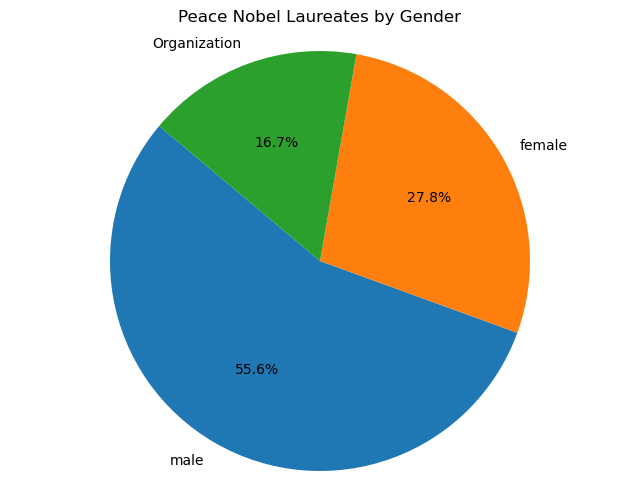

In [169]:
# Gender counts
gender_counts = {'male': 10, 'female': 5, 'Organization': 3}  # Replace with your actual data counts

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts.values(), labels=gender_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Peace Nobel Laureates by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


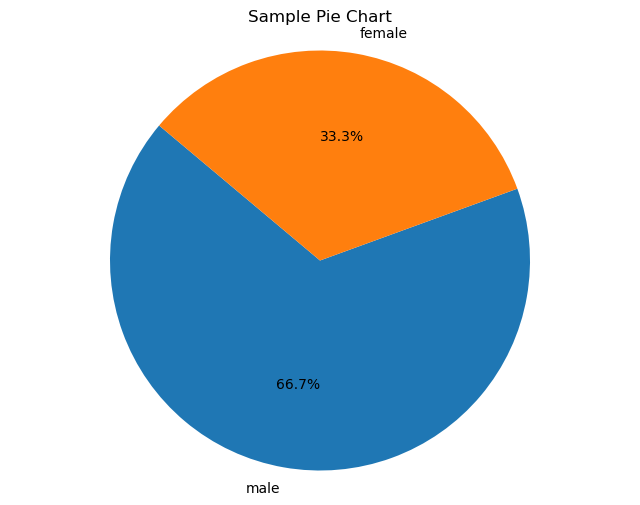

In [170]:
# Sample data
gender_counts = {'male': 10, 'female': 5}

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts.values(), labels=gender_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Sample Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Noisy data
#### Checking that these variables are within a reasonable range with Boxplot

######Boxplots to do

#### Remove from the column Gender all the Organization. 


In [171]:
count_org = (nobel_data['Gender'] == 'org').sum()
print("Number of rows with 'Gender' as 'org':", count_org)


Number of rows with 'Gender' as 'org': 30


In [172]:
filtered_data = nobel_data[nobel_data['Gender'] != 'org']

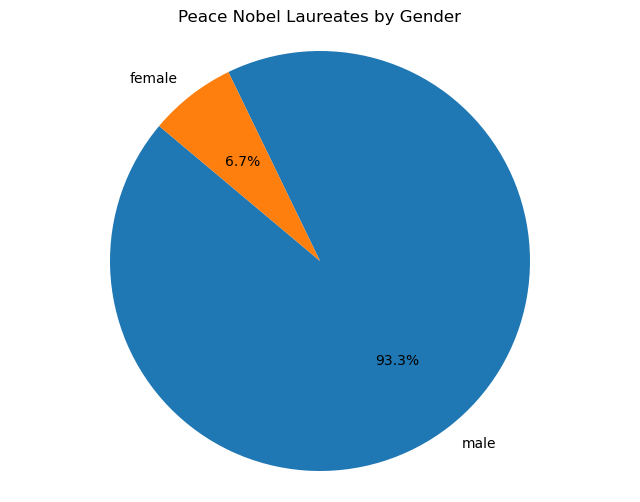

In [194]:
# Extracting gender counts from the DataFrame
gender_counts = nobel_data['Gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Peace Nobel Laureates by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Display nobel countries on a map with naturalearth_lowres

In [195]:
filtered_data.columns

Index(['Year', 'Category', 'Motivation', 'Prizeshare', 'Laureateid',
       'Fullname', 'Gender', 'Born', 'Borncountry', 'Borncity', 'Died',
       'Diedcountry', 'Diedcity', 'Organizationname', 'Organizationcountry',
       'Organizationcity'],
      dtype='object')

In [196]:
world = gpd.read_file('/Users/sarahbonnan/Desktop/ne_110m_admin_0_countries.zip')


In [197]:
world.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [200]:
# Join between the two DataFrames
merged_data = pd.merge(left=filtered_data, right=world, left_on='Borncountry', right_on='ADMIN', how='left')

# Select entries without a match in 'Borncountry'.
missing_borncountry = merged_data[merged_data['Borncountry'].isnull()]
missing_borncountry_names = missing_borncountry['ADMIN'].unique()

# Select entries without a match in 'ADMIN'.
missing_admin = merged_data[merged_data['ADMIN'].isnull()]
missing_admin_names = missing_admin['Borncountry'].unique()

# # Display the names of the countries without a match.
print("Countries in 'ADMIN' of World without a match in 'Borncountry' de nobel_data:")
print(missing_borncountry_names)

print("\nCountries in'Borncountry' of filtered_data without a match in 'ADMIN' of World:")
print(missing_admin_names)


Countries in 'ADMIN' of World without a match in 'Borncountry' de nobel_data:
[]

Countries in'Borncountry' of filtered_data without a match in 'ADMIN' of World:
['Saint Lucia']


In [201]:
remplacements = {'USA':'United States of America','the Netherlands':'Netherlands','Tanzania':'United Republic of Tanzania','Scotland':'United Kingdom','Northern Ireland':'Saint Lucia',
                'Czech Republic':'Czechia','Turkiye':'Turkey','Guadeloupe Island':'France','Faroe Islands (Denmark)':'Denmark'}

# Perform replacement in the 'Borncountry' column of the 'nobel_data' DataFrame."
filtered_data['Borncountry'].replace(remplacements, inplace=True)


/var/folders/nf/p93qxggj0y50tl5nwspm5kcw0000gn/T/ipykernel_1677/2264705397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Borncountry'].replace(remplacements, inplace=True)


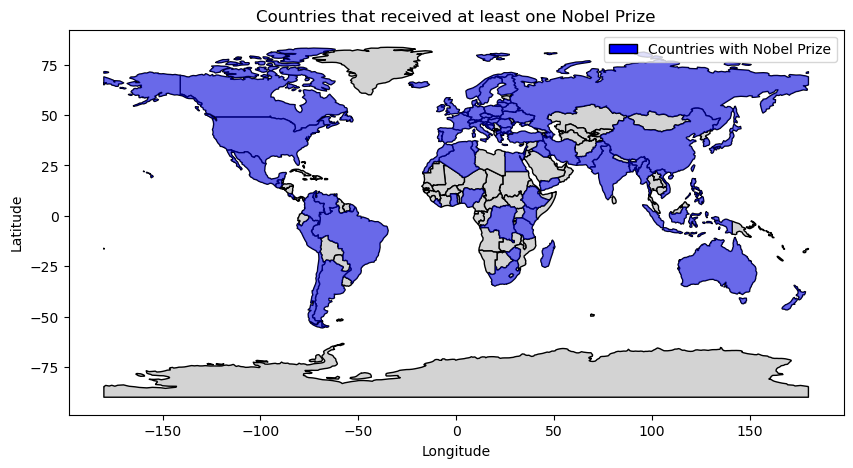

In [218]:
# Get the list of countries from the 'Borncountry' column.
born_countries = filtered_data['Borncountry'].unique()
nobel_countries = set(born_countries) 

# Load the geospatial data of countries from Natural Earth Data.
world = gpd.read_file('/Users/sarahbonnan/Desktop/ne_110m_admin_0_countries.zip')

# Merge the Nobel Prize data with the geospatial data of countries.
nobel_world = world[world['ADMIN'].isin(nobel_countries)]

# Display the map
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Display the countries that have received at least one Nobel Prize.
nobel_world.plot(ax=ax, color='blue', alpha=0.5)

# Create a custom legend for countries with Nobel Prize
legend_elements = [Patch(facecolor='blue', edgecolor='black', label='Countries with Nobel Prize')]
ax.legend(handles=legend_elements)

plt.title('Countries that received at least one Nobel Prize')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [243]:
world.plot(ax=ax, color='lightgrey', edgecolor='black')


<Axes: title={'center': 'Gender Distribution for physics'}>

<Figure size 640x480 with 0 Axes>

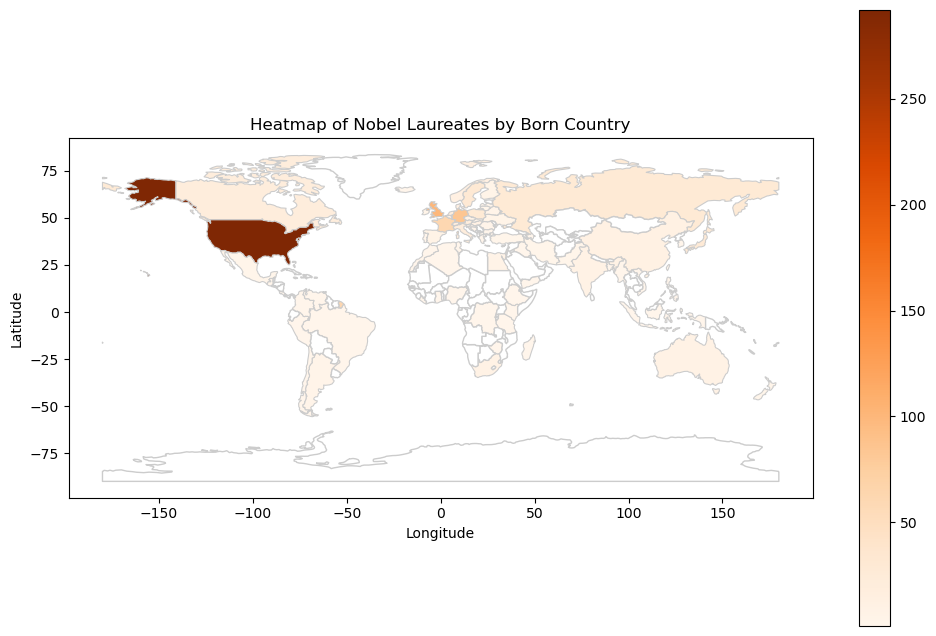

In [244]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Assuming you have already loaded the necessary data and libraries

# Count the number of Nobel Laureates born in each country
born_country_counts = filtered_data['Borncountry'].value_counts().reset_index()
born_country_counts.columns = ['ADMIN', 'Count']  # Rename columns for merging

# Load the geospatial data of countries from Natural Earth Data
world = gpd.read_file('/Users/sarahbonnan/Desktop/ne_110m_admin_0_countries.zip')

# Merge the Nobel Laureates data with the geospatial data of countries
world_with_counts = world.merge(born_country_counts, on='ADMIN', how='left')

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Plot countries with Nobel Laureates
world_with_counts.plot(column='Count', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Plot countries with no Nobel Laureates in white
world_with_counts[world_with_counts['Count'].isna()].plot(ax=ax, color='white', edgecolor='0.8')

# Add title and labels
plt.title('Heatmap of Nobel Laureates by Born Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [223]:
len(nobel_world)

81

### Analysis of ...

#### We can check if there are countries that are particularly talented in a category and win a lot of Nobel Prizes in that same category.

In [225]:
#This kind of diagramme is not suitable to this kind of data. Need to find something else.  

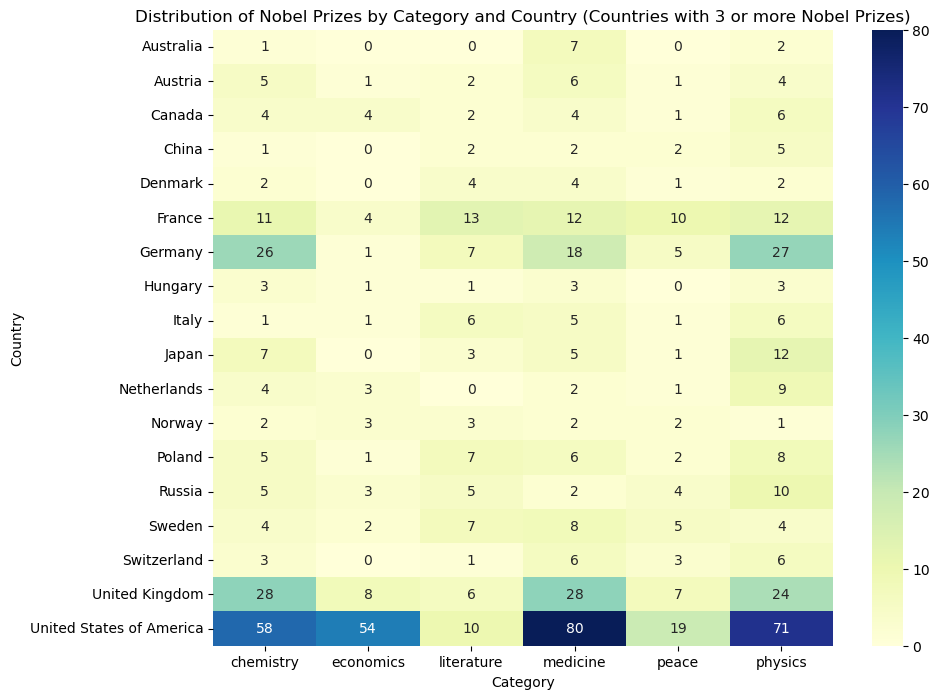

In [226]:
# Group the data by 'Borncountry' and 'Category' and count the occurrences
category_counts = filtered_data.groupby(['Borncountry', 'Category']).size().unstack(fill_value=0)

# Calculate the total Nobel Prizes by country
country_totals = category_counts.sum(axis=1)

# Filter countries with less than 3 Nobel Prizes
filtered_countries = country_totals[country_totals >= 10]

# Filter the original category_counts DataFrame based on filtered_countries
category_counts_filtered = category_counts.loc[filtered_countries.index]

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(category_counts_filtered, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Category')
plt.ylabel('Country')
plt.title('Distribution of Nobel Prizes by Category and Country (Countries with 3 or more Nobel Prizes)')
plt.show()


#### We can compare by gender with percentage. 

In [46]:
#Need to fix the Y. Only %  

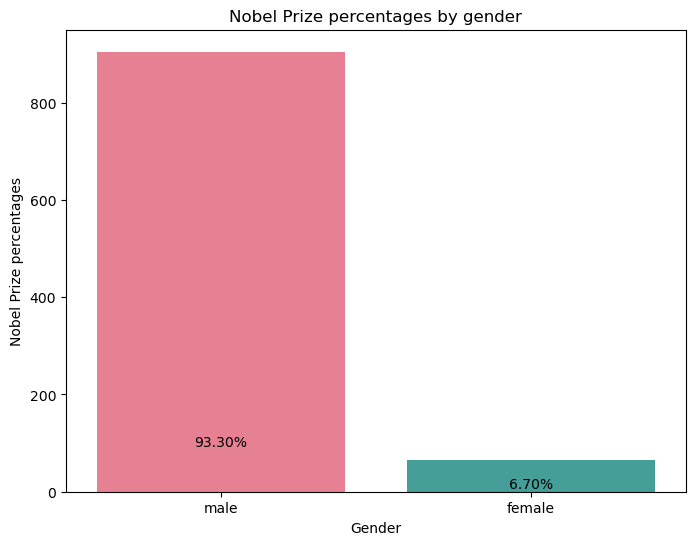

In [232]:
#Filter the DataFrame to exclude gender values that are 'UNREPORTED'
data_filtered_gender = filtered_data[filtered_data['Gender'] != 'UNREPORTED']

# Calculate Nobel Prize percentages by gender
total_counts = data_filtered_gender['Gender'].value_counts()
percentages = total_counts / total_counts.sum() * 100

# Create a countplot to compare the percentage of Nobel Prize winners by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data_filtered_gender, palette='husl', order=percentages.index)

# Add percentages above each bar
for i, p in enumerate(percentages):
    plt.text(i, p + 0.5, f'{p:.2f}%', ha='center')

# Add titles and labels
plt.title('Nobel Prize percentages by gender')
plt.xlabel('Gender')
plt.ylabel('Nobel Prize percentages')

# Afficher le graphique
plt.show()


In [233]:
#Repeat the same thing after the years where universal suffrage was applied (right to vote for women) in the majority of countries around the world.
#Review data from the 1980s. from 2000s. 

Pour visualiser le lien entre l'évolution temporelle des prix Nobel et des événements historiques mondiaux, vous pouvez utiliser un graphique linéaire superposé avec des marqueurs pour marquer les événements historiques. Voici comment vous pouvez procéder :

Préparez vos données en regroupant les prix Nobel par année et en identifiant les événements historiques importants pour chaque année.
Tracez un graphique linéaire pour montrer l'évolution temporelle des prix Nobel au fil des ans.
Ajoutez des marqueurs pour les événements historiques sur le graphique pour mettre en évidence les relations potentielles.
Voici un exemple de code pour réaliser cela 

In [240]:
data_filtered_gender[data_filtered_gender.loc[:,'Category'] == 'medicine']

category_unique = data_filtered_gender['Category'].unique()
print(category_unique)

['medicine' 'economics' 'peace' 'literature' 'chemistry' 'physics']


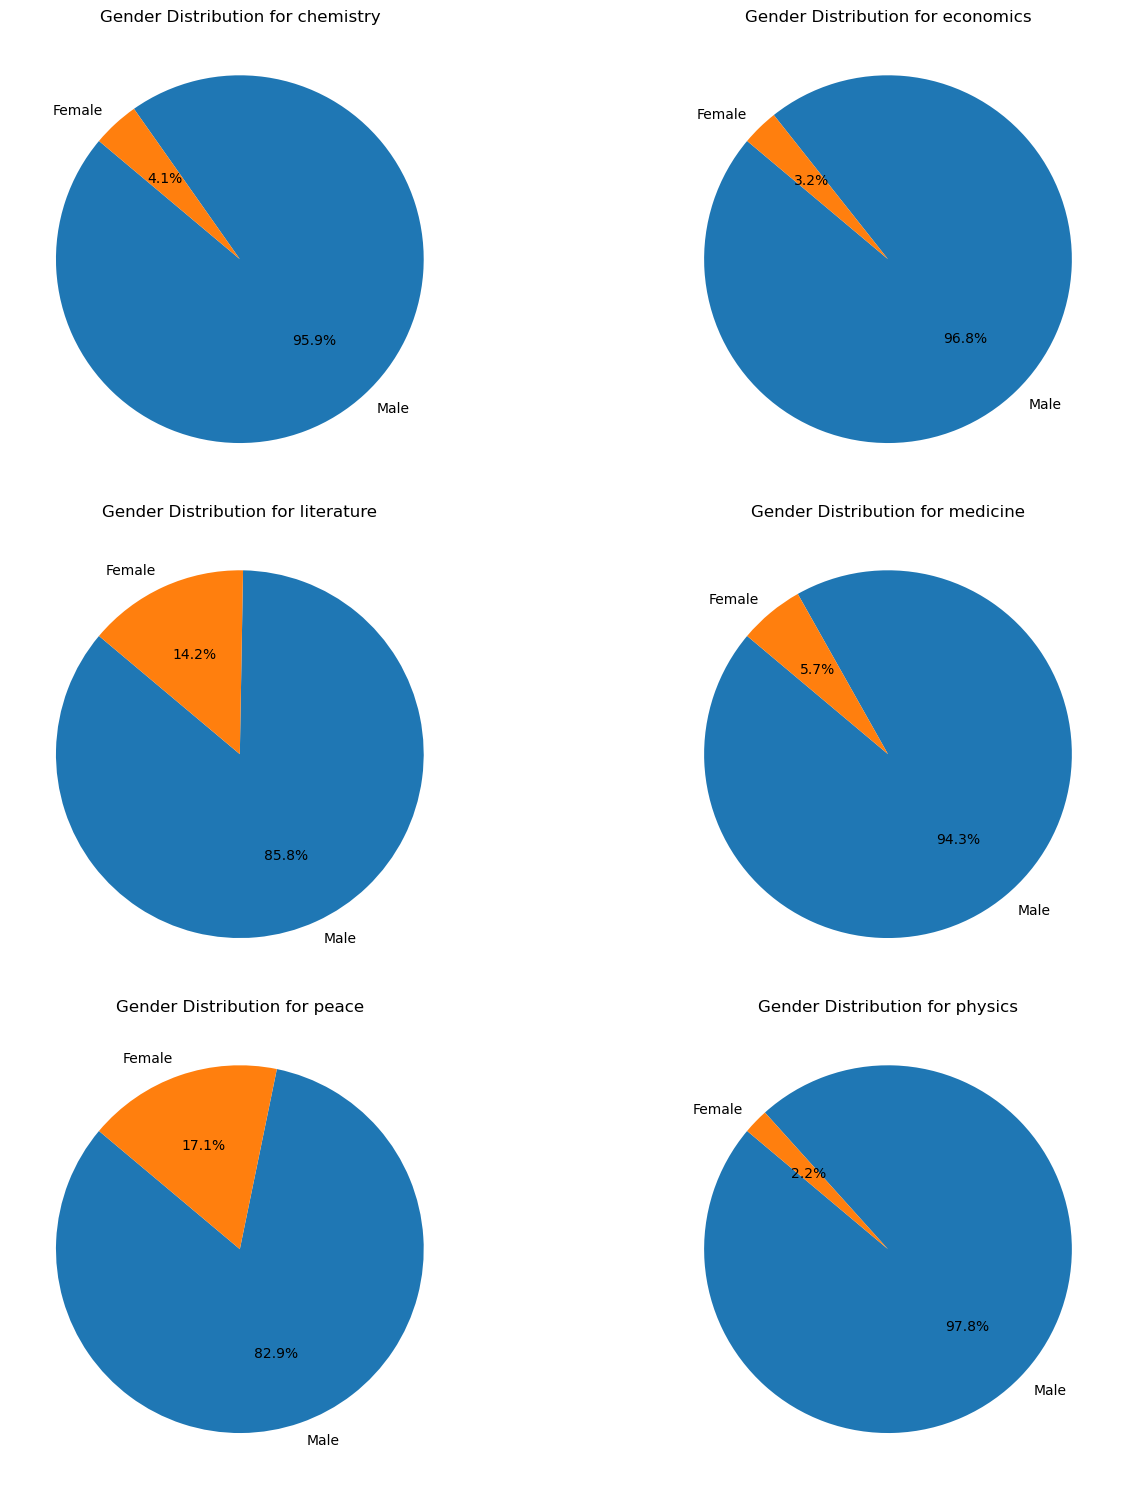

In [241]:
import pandas as pd
import matplotlib.pyplot as plt

gender_percentages = data_filtered_gender.groupby(['Category', 'Gender']).size().unstack(fill_value=0)
gender_percentages['Total'] = gender_percentages.sum(axis=1)
gender_percentages['Male Percentage'] = gender_percentages['male'] / gender_percentages['Total'] * 100
gender_percentages['Female Percentage'] = gender_percentages['female'] / gender_percentages['Total'] * 100

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Iterate over each category and plot
for i, (category, data) in enumerate(gender_percentages.iterrows()):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    sizes = [data['Male Percentage'], data['Female Percentage']]
    labels = ['Male', 'Female']

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Gender Distribution for {category}')

plt.tight_layout()
plt.show()


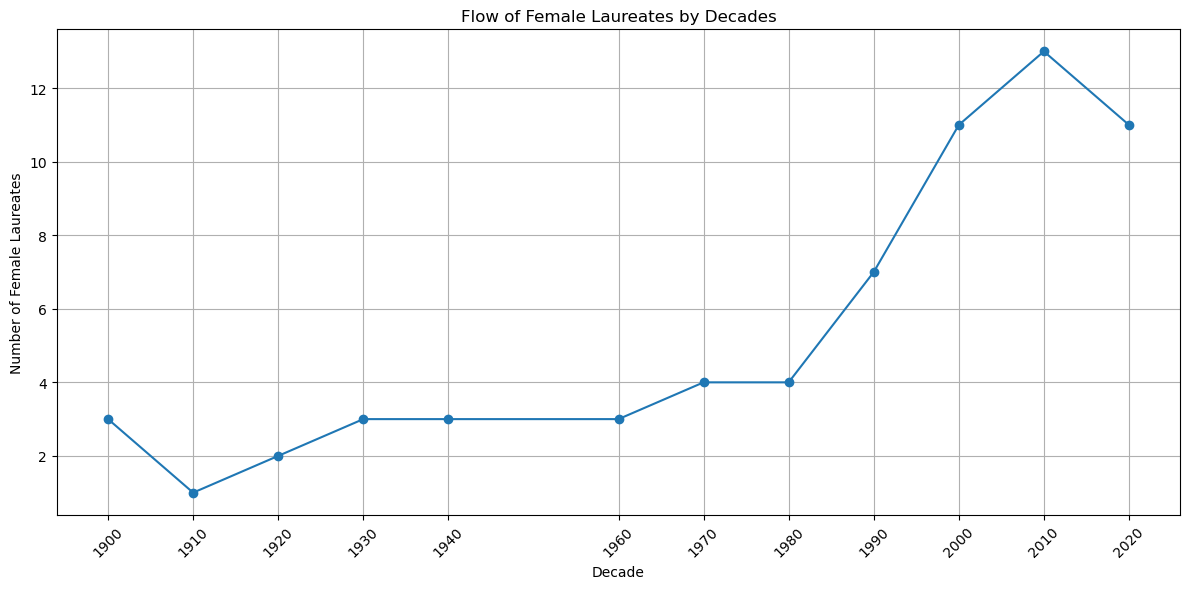

In [242]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a pandas DataFrame named nobel_data
# Replace 'Gender' and 'Year' with the actual column names from your DataFrame

# Filter data for female laureates
female_laureates = nobel_data[nobel_data['Gender'] == 'female']

# Group by decade and count the number of female laureates per decade
female_counts_by_decade = female_laureates.groupby((female_laureates['Year'] // 10) * 10).size()

# Plot the flow of female laureates by decades
plt.figure(figsize=(12, 6))
plt.plot(female_counts_by_decade.index, female_counts_by_decade.values, marker='o', linestyle='-')
plt.title('Flow of Female Laureates by Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Female Laureates')
plt.grid(True)
plt.xticks(female_counts_by_decade.index, rotation=45)
plt.tight_layout()
plt.show()
